In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(42)


In [6]:
df = pd.read_csv("master_dataset_fe_v1_encoded.csv")
df.shape


(92671, 74)

In [7]:
left_non_numeric = df.select_dtypes(exclude=[np.number]).columns.tolist()
df = df.drop(columns=left_non_numeric)


In [8]:
df = df.fillna(0)


In [9]:
leakage_cols = [
    "pv_mv_mean",
    "pv_mv_std",
    "pv_mv_max",
    "pv_mv_min",
    "pv_mv_growth"
]

df = df.drop(columns=leakage_cols, errors="ignore")
df.shape


(92671, 70)

In [10]:
df = df.select_dtypes(include=[np.number])


In [7]:
#code to print all the columns
for col in df.columns:
    print(col)

player_id
height
current_club_id
player_agent_id
team_id
inj_total_injuries
inj_total_days_out
inj_mean_days_out
inj_seasons_with_injury
perf_minutes_played
perf_goals
perf_assists
perf_clean_sheets
perf_goals_conceded
perf_goals_per90
perf_assists_per90
nat_matches
nat_goals
pv_mv_count
pv_mv_current
tr_num_transfers
tr_total_transfer_fees
tr_last_transfer_fee
tr_years_since_last_transfer
tm_unique_teammates
tm_joint_minutes
tm_joint_goal_participation
team_team_seasons_count
team_competitions_count
team_latest_season
goals_per90
assists_per90
sentiment_score_norm
tweet_count
positive_ratio
negative_ratio
sentiment_volatility
age
current_club_id_log
team_id_log
perf_goals_rolling_5
perf_goals_rolling_10
perf_assists_rolling_5
perf_assists_rolling_10
perf_minutes_played_rolling_5
perf_minutes_played_rolling_10
goals_per90_rolling_5
goals_per90_rolling_10
assists_per90_rolling_5
assists_per90_rolling_10
goal_involv_per90
injury_risk
mv_gap_from_peak
mv_pct_from_peak
age_at_join
position

In [8]:
TARGET = "pv_mv_current"

X = df.drop(columns=[TARGET])
y = df[TARGET]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R2  :", r2_score(y_train, y_pred_train))
print("Test R2   :", r2_score(y_test, y_pred_test))



Train RMSE: 2242097.0463612815
Test RMSE : 2102508.6348341973
Train R2  : 0.6501838497181409
Test R2   : 0.6779308962313019


In [9]:
TARGET = "pv_mv_current"

X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((74136, 69), (18535, 69))

In [10]:
baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

baseline.fit(X_train, y_train)

y_pred_train_base = baseline.predict(X_train)
y_pred_test_base = baseline.predict(X_test)

baseline_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_base))
baseline_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_base))
baseline_train_r2 = r2_score(y_train, y_pred_train_base)
baseline_test_r2 = r2_score(y_test, y_pred_test_base)

print("Baseline Train RMSE:", round(baseline_train_rmse,4))
print("Baseline Test RMSE :", round(baseline_test_rmse,4))
print("Baseline Train R2  :", round(baseline_train_r2,4))
print("Baseline Test R2   :", round(baseline_test_r2,4))


Baseline Train RMSE: 2242097.0464
Baseline Test RMSE : 2102508.6348
Baseline Train R2  : 0.6502
Baseline Test R2   : 0.6779


In [11]:
TARGET = "pv_mv_current"

X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

corr = pd.concat([X_train, y_train], axis=1).corr()[TARGET].abs().sort_values(ascending=False)
corr.head(20)


pv_mv_current                  1.000000
team_club_name_te              0.744396
current_club_name_te           0.724171
tr_last_transfer_fee           0.594069
team_competition_id_te         0.573142
tr_total_transfer_fees         0.512200
team_country_name_te           0.269638
inj_total_injuries             0.208169
mv_gap_from_peak               0.207819
nat_matches                    0.204938
team_competitions_count        0.194110
tm_joint_goal_participation    0.193971
team_team_seasons_count        0.193712
nat_goals                      0.190300
inj_seasons_with_injury        0.189592
team_latest_season             0.186557
perf_assists_rolling_5         0.160824
perf_assists                   0.160824
perf_assists_rolling_10        0.160824
pv_mv_count                    0.135643
Name: pv_mv_current, dtype: float64

In [12]:
top_k = 30
top_features = corr.index[1:top_k+1]  
top_features


Index(['team_club_name_te', 'current_club_name_te', 'tr_last_transfer_fee',
       'team_competition_id_te', 'tr_total_transfer_fees',
       'team_country_name_te', 'inj_total_injuries', 'mv_gap_from_peak',
       'nat_matches', 'team_competitions_count', 'tm_joint_goal_participation',
       'team_team_seasons_count', 'nat_goals', 'inj_seasons_with_injury',
       'team_latest_season', 'perf_assists_rolling_5', 'perf_assists',
       'perf_assists_rolling_10', 'pv_mv_count', 'perf_goals_rolling_10',
       'perf_goals', 'perf_goals_rolling_5', 'tr_last_transfer_date_te',
       'perf_assists_per90', 'assists_per90_rolling_5',
       'assists_per90_rolling_10', 'assists_per90', 'mv_pct_from_peak',
       'country_of_birth_te', 'goal_involv_per90'],
      dtype='object')

In [ ]:
degrees = [2]  
alphas = np.logspace(-3, 3, 13)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

X_train_poly_base = X_train[top_features]
X_test_poly_base = X_test[top_features]

for deg in degrees:
    poly = PolynomialFeatures(
        degree=deg,
        interaction_only=True,     
        include_bias=False
    )

    pipeline = Pipeline([
        ('poly', poly),
        ('scaler', StandardScaler()),
        ('ridgecv', RidgeCV(alphas=alphas, cv=cv, scoring='neg_mean_squared_error'))
    ])

    pipeline.fit(X_train_poly_base, y_train)

    best_alpha = pipeline.named_steps['ridgecv'].alpha_
    y_pred_train = pipeline.predict(X_train_poly_base)
    y_pred_test = pipeline.predict(X_test_poly_base)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    n_input_feats = X_train_poly_base.shape[1]
    n_poly_feats = pipeline.named_steps['poly'].n_output_features_

    results.append({
        'degree': deg,
        'input_features': n_input_feats,
        'poly_features': n_poly_feats,
        'interaction_only': True,
        'best_alpha': best_alpha,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    })

results_df = pd.DataFrame(results)
results_df


,degree,input_features,poly_features,interaction_only,best_alpha,train_rmse,test_rmse,train_r2,test_r2
0,2,30,465,True,1000.0,1.567372e+06,1.583172e+06,0.829048,0.817388


# Lasso regression  on Polynomial Interactions (top-K features)

We:
1. Select top-K features correlated with `pv_mv_current`.
2. Create degree-2 interaction-only polynomial features on those features.
3. Fit `LassoCV` with scaling.
4. Compare RMSE and R² on train/test.


In [10]:
TARGET = "pv_mv_current"
K = 25
X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

corr = pd.concat([X_train, y_train], axis=1).corr()[TARGET].abs().sort_values(ascending=False)
top_features = [c for c in corr.index if c != TARGET][:K]
print("Top features (K={}):".format(K))
print(top_features)
print("Original feature count:", X_train.shape[1])


Top features (K=25):
['team_club_name_te', 'current_club_name_te', 'tr_last_transfer_fee', 'team_competition_id_te', 'tr_total_transfer_fees', 'team_country_name_te', 'social_media_url_has_url', 'inj_total_injuries', 'mv_gap_from_peak', 'nat_matches', 'team_competitions_count', 'tm_joint_goal_participation', 'team_team_seasons_count', 'nat_goals', 'inj_seasons_with_injury', 'team_latest_season', 'perf_assists', 'perf_assists_rolling_5', 'perf_assists_rolling_10', 'pv_mv_count', 'perf_goals', 'perf_goals_rolling_10', 'perf_goals_rolling_5', 'tr_last_transfer_date_te', 'assists_per90_rolling_5']
Original feature count: 73


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_top = X_train[top_features].copy()
X_test_top = X_test[top_features].copy()

poly.fit(X_train_top)
n_input_feats = X_train_top.shape[1]
n_poly_feats = poly.n_output_features_
print("Input features (top K):", n_input_feats)
print("Polynomial interaction-only features:", n_poly_feats)


Input features (top K): 25
Polynomial interaction-only features: 325


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

poly_fresh = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

alphas = np.logspace(-4, 2, 30)
cv = 5

lasso_pipeline = Pipeline([
    ('poly', poly_fresh),
    ('scaler', StandardScaler()),
    ('lassocv', LassoCV(alphas=alphas, cv=cv, n_jobs=-1, max_iter=20000, tol=1e-4))
])

Xtr_arr = X_train_top.values
Xte_arr = X_test_top.values

lasso_pipeline.fit(Xtr_arr, y_train.values)

best_alpha_lasso = float(lasso_pipeline.named_steps['lassocv'].alpha_)

y_pred_train_lasso = lasso_pipeline.predict(Xtr_arr)
y_pred_test_lasso  = lasso_pipeline.predict(Xte_arr)

lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
lasso_test_rmse  = np.sqrt(mean_squared_error(y_test,  y_pred_test_lasso))
lasso_train_r2   = r2_score(y_train, y_pred_train_lasso)
lasso_test_r2    = r2_score(y_test,  y_pred_test_lasso)

print("Lasso best alpha:", best_alpha_lasso)
print("Lasso Train RMSE:", round(lasso_train_rmse,4))
print("Lasso Test  RMSE:", round(lasso_test_rmse,4))
print("Lasso Train R2 :", round(lasso_train_r2,4))
print("Lasso Test  R2 :", round(lasso_test_r2,4))


c:\Users\karan\anaconda3\envs\agent\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+16, tolerance: 9.312e+13
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\karan\anaconda3\envs\agent\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+16, tolerance: 8.491e+13
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\karan\anaconda3\envs\agent\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regul

Lasso best alpha: 100.0
Lasso Train RMSE: 1784288.8955
Lasso Test  RMSE: 1915585.1916
Lasso Train R2 : 0.7785
Lasso Test  R2 : 0.7327


# Feature Selection: Correlation + Feature Importance

**Purpose:** produce a reliable ranked list of features using:
- correlation with the target,
- model-based importance (Random Forest),
- permutation importance for robust ranking.

Output: A csv file containing the final chosen features.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_regression

TARGET = "pv_mv_current"
RANDOM_STATE = 42


In [14]:

print("Shape:", df.shape)
print("Target present:", TARGET in df.columns)
print("Any NaNs:", df.isna().any().any())
df = df.select_dtypes(include=[np.number]).copy()
print("Numeric-only shape:", df.shape)


Shape: (92671, 70)
Target present: True
Any NaNs: False
Numeric-only shape: (92671, 70)


In [15]:
corr_with_target = df.corr(numeric_only=True)[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
top_pos = corr_with_target.head(25)
top_neg = corr_with_target.tail(25)

print("Top positive correlations:\n", top_pos.head(10))
print("\nTop negative correlations:\n", top_neg.tail(10))


Top positive correlations:
 team_club_name_te          0.740425
current_club_name_te       0.722602
tr_last_transfer_fee       0.602459
team_competition_id_te     0.574120
tr_total_transfer_fees     0.521729
team_country_name_te       0.270523
inj_total_injuries         0.207645
mv_gap_from_peak           0.204337
nat_matches                0.200530
team_competitions_count    0.194063
Name: pv_mv_current, dtype: float64

Top negative correlations:
 tr_years_since_last_transfer   -0.034170
tr_num_transfers               -0.051091
age_at_join                    -0.053640
tm_joint_minutes               -0.061666
team_id                        -0.069737
current_club_id                -0.069737
age                            -0.075714
current_club_id_log            -0.082327
team_id_log                    -0.082327
mv_pct_from_peak               -0.098879
Name: pv_mv_current, dtype: float64


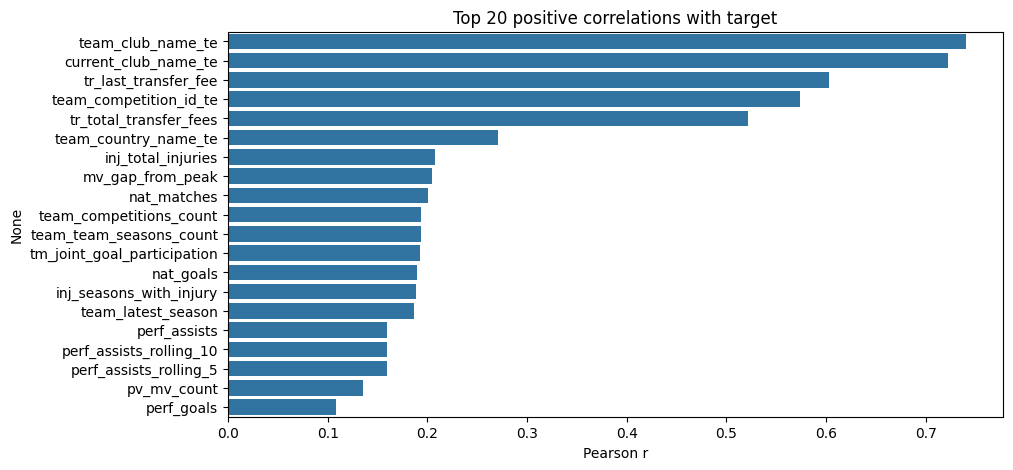

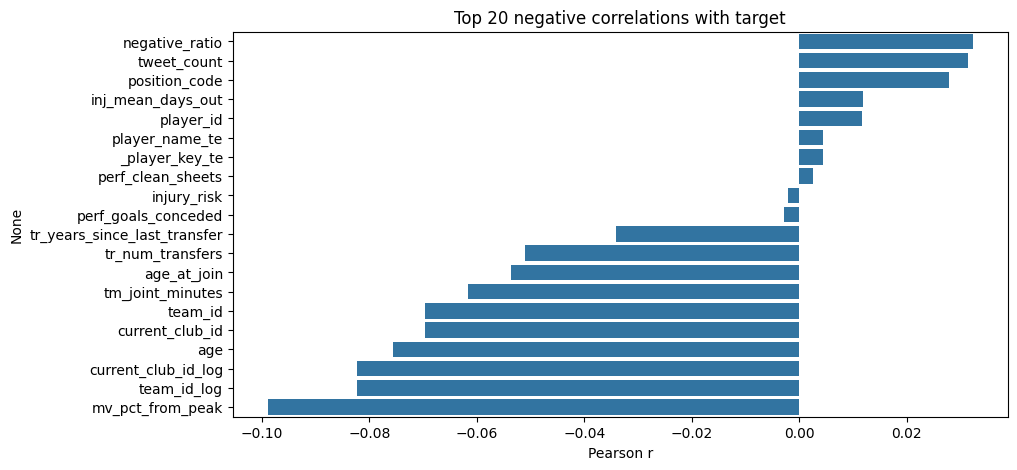

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_pos.values[:20], y=top_pos.index[:20])
plt.title("Top 20 positive correlations with target")
plt.xlabel("Pearson r")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_neg.values[-20:], y=top_neg.index[-20:])
plt.title("Top 20 negative correlations with target")
plt.xlabel("Pearson r")
plt.show()


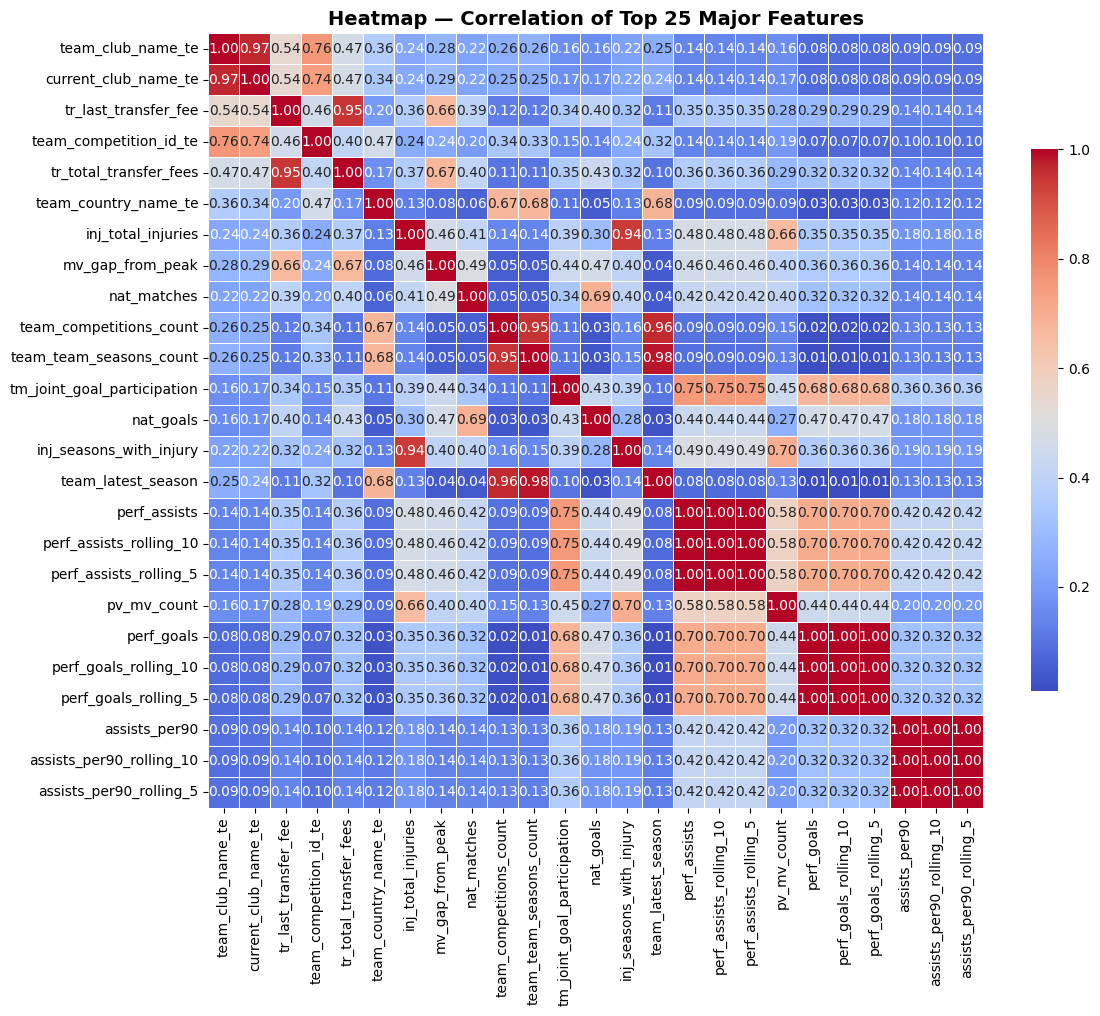

In [17]:
K = 25
top_k_features = corr_with_target.head(K).index.tolist()

plt.figure(figsize=(12, 10)) 

sns.heatmap(
    df[top_k_features].corr(),annot=True,cmap="coolwarm",square=True,
    fmt=".2f",linewidths=0.5,cbar_kws={"shrink": 0.7})
plt.title(f"Heatmap — Correlation of Top {K} Major Features", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [53]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

mi = mutual_info_regression(X, y, random_state=RANDOM_STATE)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_top = mi_series.head(30)
print("Top mutual information features:\n", mi_top)


Top mutual information features:
 mv_pct_from_peak                0.692964
current_club_name_te            0.620386
team_id_log                     0.502337
current_club_id_log             0.501698
current_club_id                 0.500579
team_id                         0.498643
team_club_name_te               0.450071
team_competition_id_te          0.447074
mv_gap_from_peak                0.281564
team_country_name_te            0.261818
player_agent_id                 0.228520
team_competitions_count         0.215610
team_team_seasons_count         0.215610
team_latest_season              0.195924
pv_mv_count                     0.192942
age                             0.165020
player_id                       0.147106
tm_joint_goal_participation     0.141572
tm_unique_teammates             0.135960
tr_last_transfer_fee            0.126532
tr_total_transfer_fees          0.122540
tr_first_transfer_date_te       0.111056
tr_years_since_last_transfer    0.104494
perf_assists_rolling_5 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print("RF Train R2:", round(rf_train_score,4), " RF Test R2:", round(rf_test_score,4))


RF Train R2: 0.9741  RF Test R2: 0.8596


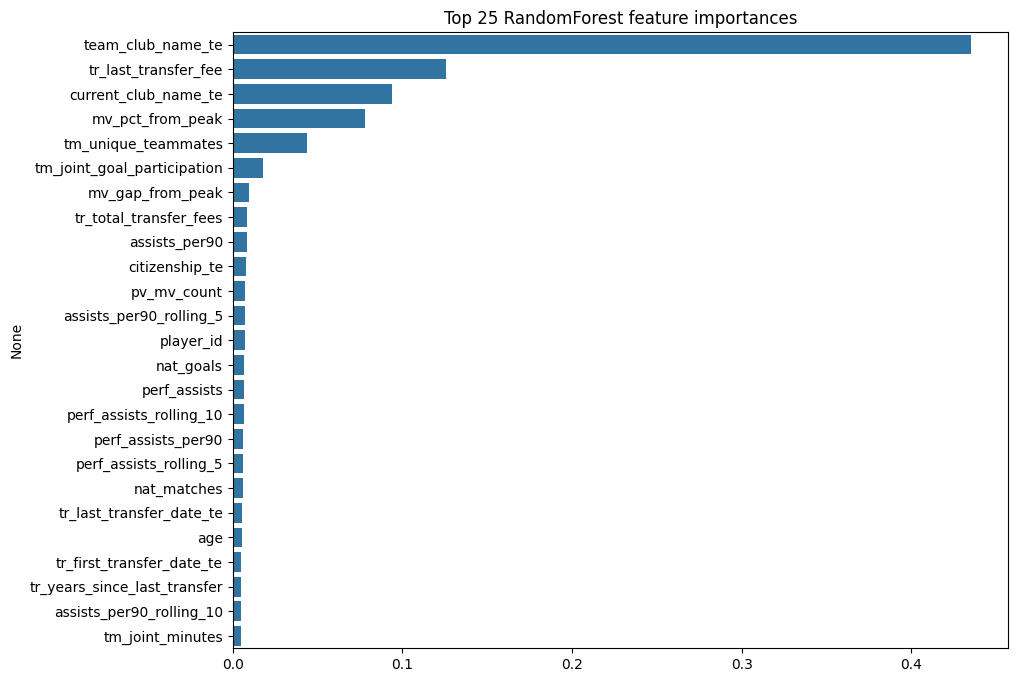

In [23]:
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_top = rf_importances.head(50)
plt.figure(figsize=(10,8))
sns.barplot(x=rf_top.values[:25], y=rf_top.index[:25])
plt.title("Top 25 RandomForest feature importances")
plt.show()


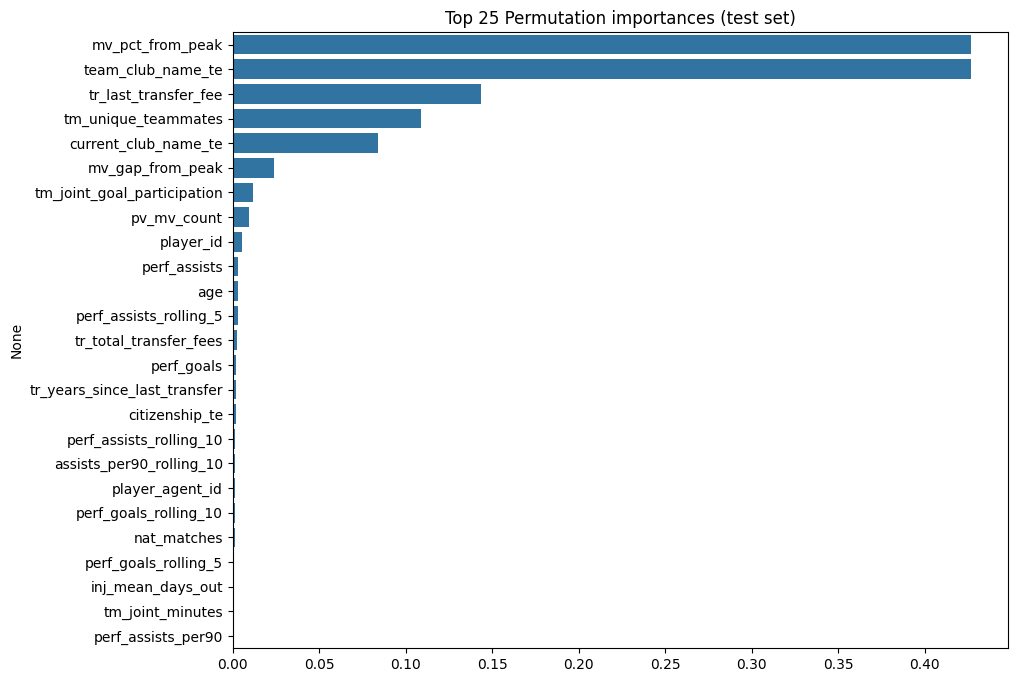

In [21]:
perm = permutation_importance(rf, X_test, y_test, n_repeats=8, random_state=RANDOM_STATE, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
perm_top = perm_importances.head(50)

plt.figure(figsize=(10,8))
sns.barplot(x=perm_top.values[:25], y=perm_top.index[:25])
plt.title("Top 25 Permutation importances (test set)")
plt.show()


### Combine correlation, mutual information, RF importance and permutation importance
We create a combined score to rank features more robustly.


In [24]:
feat_df = pd.DataFrame({
    'corr_with_target': corr_with_target,
    'mutual_info': mi_series,
    'rf_importance': rf_importances,
    'perm_importance': perm_importances
}).fillna(0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(feat_df), index=feat_df.index, columns=feat_df.columns)
scaled['combined_score'] = scaled.mean(axis=1)
ranked = scaled.sort_values('combined_score', ascending=False)

ranked.head(30)


,corr_with_target,mutual_info,rf_importance,perm_importance,combined_score
team_club_name_te,1.000000,0.649488,1.000000,0.999771,0.912315
current_club_name_te,0.978764,0.895266,0.215173,0.201022,0.572556
mv_pct_from_peak,0.000000,1.000000,0.178892,1.000000,0.544723
tr_last_transfer_fee,0.835618,0.182595,0.288977,0.340283,0.411868
team_competition_id_te,0.801854,0.645163,0.008478,0.005212,0.365177
tr_total_transfer_fees,0.739431,0.176835,0.019410,0.010658,0.236583
mv_gap_from_peak,0.361270,0.406318,0.022253,0.060507,0.212587
team_country_name_te,0.440129,0.377824,0.006732,0.005514,0.207550
tm_unique_teammates,0.216691,0.196201,0.100491,0.259577,0.193240
current_club_id,0.034722,0.722375,0.003272,0.004974,0.191336


In [ ]:
N = 40
candidate_features = ranked.head(N).index.tolist()

threshold = 0.70
selected = []
for feat in candidate_features:
    if not selected:
        selected.append(feat)
        continue
    too_high = False
    for s in selected:
        if abs(df[feat].corr(df[s])) > threshold:
            too_high = True
            break
    if not too_high:
        selected.append(feat)

print("Final selected features (after collinearity filter):", len(selected))
selected[:50]


Final selected features (after collinearity filter): 23


['team_club_name_te',
 'mv_pct_from_peak',
 'tr_last_transfer_fee',
 'mv_gap_from_peak',
 'team_country_name_te',
 'tm_unique_teammates',
 'current_club_id',
 'team_competitions_count',
 'tm_joint_goal_participation',
 'pv_mv_count',
 'player_agent_id',
 'inj_total_injuries',
 'nat_matches',
 'nat_goals',
 'tr_last_transfer_date_te',
 'perf_assists_per90',
 'player_id',
 'tr_first_transfer_date_te',
 'country_of_birth_te',
 'inj_total_days_out',
 'perf_goals',
 'citizenship_te',
 'goal_involv_per90']

In [26]:
sel_df = pd.DataFrame({'selected_features': selected})
sel_df.to_csv("selected_features_correl_importance.csv", index=False)
print("Saved selected_features_correl_importance.csv")


Saved selected_features_correl_importance.csv


## Summary

1. I used **three complementary signals** to rank features:
   - Pearson correlation (linear signal),
   - Mutual information (non-linear signal),
   - Model-based importance (Random Forest) and permutation importance (robust impact on predictions).

2. I normalized these signals and averaged them into a **combined score** to get a balanced ranking.

3. From the top-N candidates I removed highly collinear features (corr > 0.75) to avoid redundancy and multicollinearity in linear models.

4. Final list saved as `selected_features_correl_importance.csv` 


### LightBGM model training

In [11]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [12]:
final_features = [
    "mv_pct_from_peak",
    "current_club_name_te",
    "team_club_name_te",
    "team_competition_id_te",
    "mv_gap_from_peak",
    "team_country_name_te",
    "team_competitions_count",
    "team_team_seasons_count",
    "team_latest_season",
    "pv_mv_count",
    "age",
    "tm_joint_goal_participation",
    "tm_unique_teammates",
    "tr_last_transfer_fee",
    "tr_total_transfer_fees",
    "tr_first_transfer_date_te",
    "tr_years_since_last_transfer",
    "perf_assists_rolling_5",
    "inj_total_injuries",
    "tr_last_transfer_date_te",
    "perf_assists",
    "perf_assists_rolling_10",
    "inj_mean_days_out",
    "inj_seasons_with_injury"
]


In [15]:
X = df[final_features]
y = df["pv_mv_current"]
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [16]:
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)


In [62]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "min_data_in_leaf": 20,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
    "verbosity": -1,
    "seed": 42
}


In [64]:
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=["train", "valid"],
    num_boost_round=3000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 100 rounds
[100]	train's rmse: 1.08608e+06	valid's rmse: 1.35972e+06
[200]	train's rmse: 809925	valid's rmse: 1.3691e+06
Early stopping, best iteration is:
[130]	train's rmse: 987245	valid's rmse: 1.34599e+06


In [67]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = lgb_model.predict(X_train, num_iteration=lgb_model.best_iteration)
y_val_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Train R2:", train_r2)
print("Validation R2:", val_r2)


Train RMSE: 987244.5045085493
Validation RMSE: 1345990.2122871652
Train R2: 0.9321764538972515
Validation R2: 0.8680050571782804


In [68]:
import joblib

joblib.dump(lgb_model, "lightgbm_model.pkl")
joblib.dump(final_features, "final_features.pkl")


['final_features.pkl']

## HYPERPARAMETER TUNING

In [70]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [200, 400, 600, 800, 1000],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 10, 20, 30],
    "min_child_samples": [20, 30, 50, 100],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0.0, 0.1, 0.5],
    "reg_lambda": [0.0, 0.1, 0.5]
}



In [71]:
lgb_model = lgb.LGBMRegressor(
    objective="regression",
    random_state=42,
    n_jobs=-1
)

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [72]:
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [73]:
best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Train R2:", train_r2)
print("Validation R2:", val_r2)


Train RMSE: 501682.1727574994
Validation RMSE: 1337088.2426935714
Train R2: 0.9824858776080804
Validation R2: 0.8697452323461746


In [74]:
import joblib

joblib.dump(best_model, "lightgbm_best_model.pkl")
joblib.dump(final_features, "final_features.pkl")


['final_features.pkl']

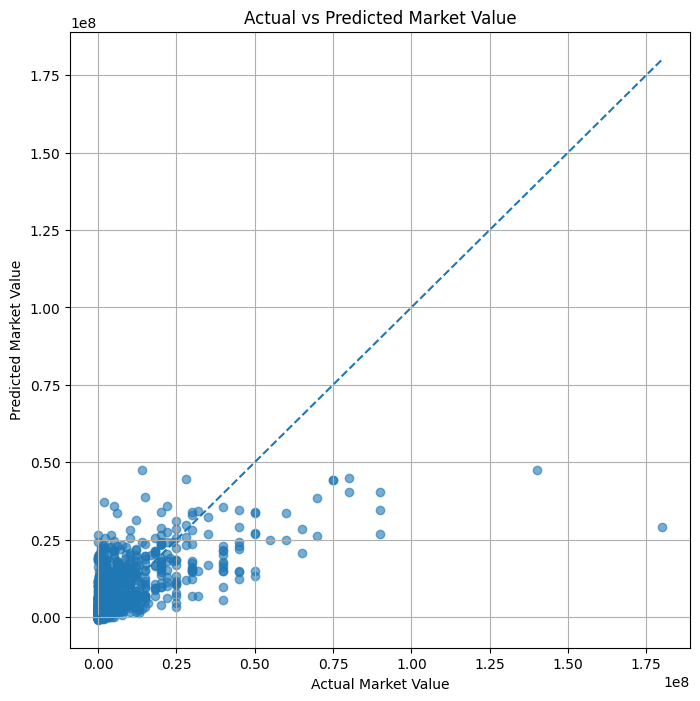

In [77]:
y_pred_tuned = best_model.predict(X_test)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tuned, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value")
plt.grid(True)
plt.show()



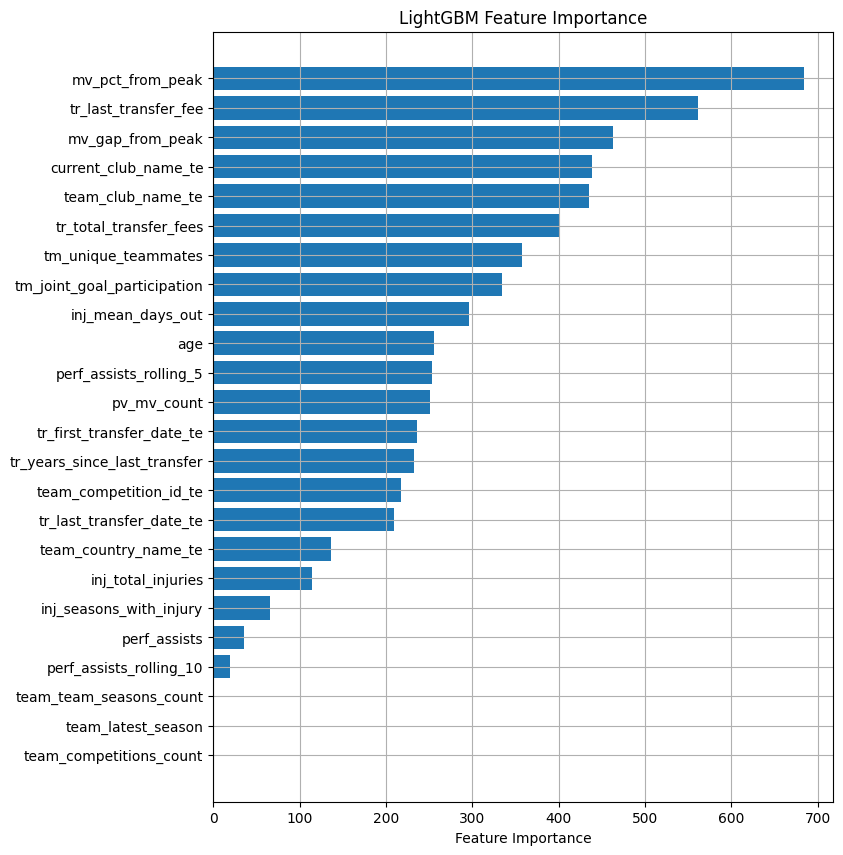

In [80]:
importance_df = pd.DataFrame({
    "Feature": final_features,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(8, 10))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importance")
plt.grid(True)
plt.show()


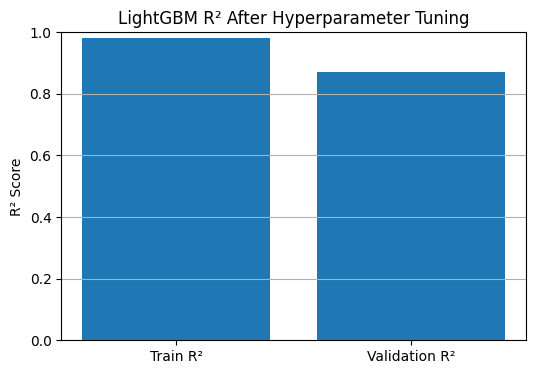

In [21]:
r2_values = [0.9824858776080804, 0.8697452323461746]
labels = ["Train R²", "Validation R²"]

plt.figure(figsize=(6,4))
plt.bar(labels, r2_values)
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("LightGBM R² After Hyperparameter Tuning")
plt.grid(axis="y")
plt.show()


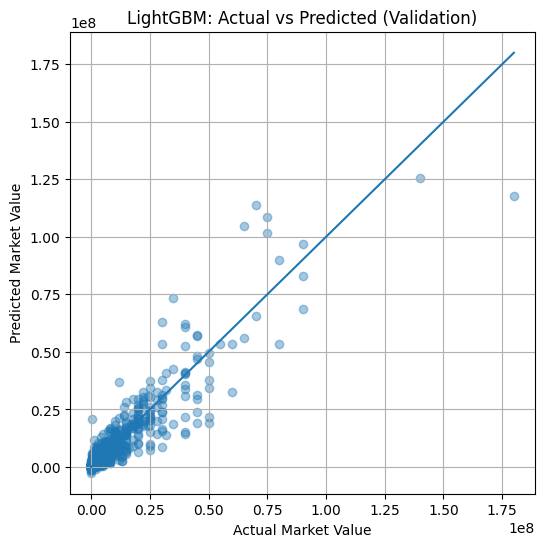

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
with open("lightgbm_best_model.pkl", "rb") as f:
    best_model = pickle.load(f)
y_val_pred = best_model.predict(X_val)

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()])
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("LightGBM: Actual vs Predicted (Validation)")
plt.grid(True)
plt.show()
